## Audio Exploration

A quick and optional notebook for exploring an audio clip and its associated spectrogram! This is an optional notebook, mostly used to generate some visualizations in the presentation :)

In [8]:
import torch 
import torchaudio
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load in the Waveform
waveform, sample_rate = torchaudio.load("../data/pvqd/audio_clips/BL01 ENSS.wav")
print("Sample Rate of the Audio: %s " % sample_rate)

Sample Rate of the Audio: 44100 


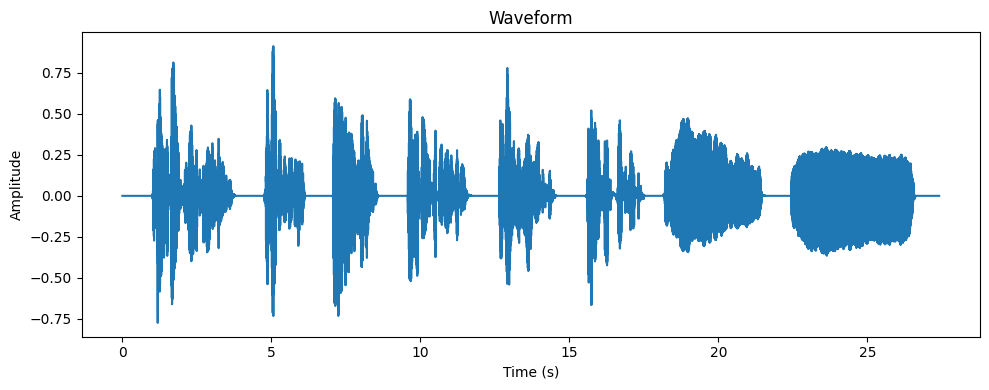

In [13]:
# Convert to NumPy array
waveform_np = waveform.cpu().detach().numpy()

# Create a time axis in seconds
time_axis = np.linspace(0, waveform_np.shape[1] / sample_rate, waveform_np.shape[1])

# Plot
plt.figure(figsize=(10, 4))

# Check if the waveform is stereo or mono
if waveform_np.shape[0] == 2:  # Stereo
    plt.plot(time_axis, waveform_np[0], label='Left Channel')
    plt.plot(time_axis, waveform_np[1], label='Right Channel')
    plt.legend()
else:  # Mono
    plt.plot(time_axis, waveform_np[0])

plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.savefig("../data/assets/waveform.png")
plt.show()

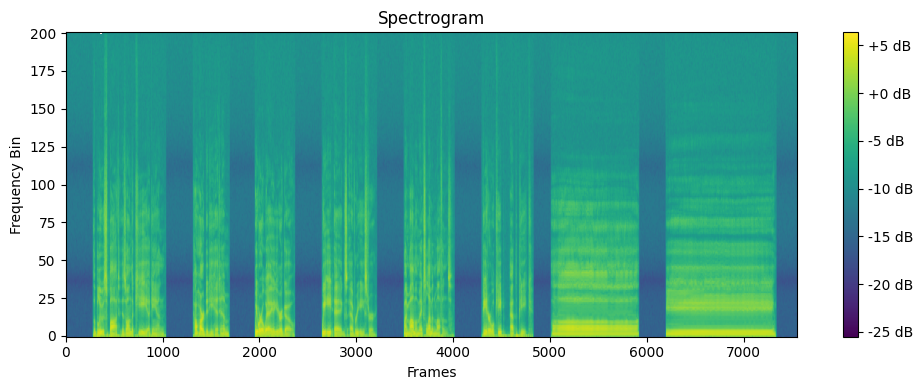

In [12]:
# Compute the STFT (aka Spectrogram)
n_fft = 400  # Size of FFT, which will also determine the frequency bins
hop_length = 160  # Number of samples between successive frames
win_length = 400  # Window size
window = torch.hann_window(win_length)  # Define window type

# Compute STFT
spec = torch.stft(waveform, n_fft, hop_length, win_length, window, center=True, pad_mode='reflect', normalized=False, onesided=True, return_complex=True)

# Convert to spectrogram by computing the magnitude
spectrogram = torch.abs(spec)

# Plot the spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(spectrogram.log2().squeeze(0), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Frames')
plt.ylabel('Frequency Bin')
plt.tight_layout()
plt.savefig("../data/assets/spec.png")
plt.show()
